<a href="https://colab.research.google.com/github/denmau/tensorflow-practice/blob/main/CNN_Week_1_Question_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [6]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [7]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-02-10 17:22:44--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.32.68.203, 2600:1408:3000:294::e59, 2600:1408:3000:28b::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.32.68.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   307MB/s    in 2.6s    

2021-02-10 17:22:46 (307 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [8]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [9]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    
    %cd '/tmp/'
    %mkdir 'cats-v-dogs'

    %cd '/tmp/cats-v-dogs/'
    %mkdir training testing

    %cd '/tmp/cats-v-dogs/training'
    %mkdir cats dogs

    %cd '/tmp/cats-v-dogs/testing'
    %mkdir cats dogs

except OSError:
    pass

/tmp
mkdir: cannot create directory ‘cats-v-dogs’: File exists
/tmp/cats-v-dogs
mkdir: cannot create directory ‘training’: File exists
mkdir: cannot create directory ‘testing’: File exists
/tmp/cats-v-dogs/training
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
/tmp/cats-v-dogs/testing
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists


In [10]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE

  NUMBER_FILES_TO_COPY = int(len(os.listdir(SOURCE)) * SPLIT_SIZE)

  counter = int(0) # helps keep track copying files upto the 90% of files contained in SOURCE

  # shuffle files then for each file decide if to copy
  files_list = list(os.listdir(SOURCE))
  # print(f'length of files_list: {len(files_list)}')

  # pick a random file from files_list
  for SOURCE_FILE in random.sample(files_list, len(files_list)):
    # get the full path of this file
    full_path = f"{SOURCE}/{SOURCE_FILE}"
    training_destination_dir = f'{TRAINING}/{SOURCE_FILE}'
    testing_destination_dir = f'{TESTING}/{SOURCE_FILE}'

    # if training_destination_dir hasn't yet received 90%
    if counter < NUMBER_FILES_TO_COPY:
      # if file size is greater than zero, copy to destination directory
      if os.stat(full_path).st_size > 0:
        copyfile(full_path, training_destination_dir)
        counter+=1 # only count the number of files that have been copied
      elif (os.stat(full_path).st_size <= 0):
        print(f'{SOURCE_FILE} is zero length, so ignoring')
        # ignored files are neither copied nor counted as having been copied
        continue

    # if 90% of files have already been copied, start copying to testing_destination_dir
    else:
      # copy file is size is greater than 0, otherwise display file as having been ignored
      if (os.stat(full_path).st_size > 0):
        copyfile(full_path, testing_destination_dir)
      else:
        print(f'{SOURCE_FILE} is zero length, so ignoring')

# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [11]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [12]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
  # First layer 
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  # Second layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2), 
  # Third layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the layers
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'), 
  # 1 output neuron (0 or 1)
  tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
TRAINING_DIR = "/tmp/cats-v-dogs/training" #YOUR CODE HERE
train_datagen = ImageDataGenerator( rescale = 1.0/255. ) #YOUR CODE HERE
train_generator =  train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) #YOUR CODE HERE

VALIDATION_DIR = "/tmp/cats-v-dogs/testing" #YOUR CODE HERE
validation_datagen = ImageDataGenerator( rescale = 1.0/255. ) #YOUR CODE HERE
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150)) #YOUR CODE HERE



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
1125/1125 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.6241

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1125/1125 [==============================] - 84s 68ms/step - loss: 0.6980 - accuracy: 0.6242 - val_loss: 0.5409 - val_accuracy: 0.7164
Epoch 2/15
1125/1125 [==============================] - 76s 67ms/step - loss: 0.4653 - accuracy: 0.7848 - val_loss: 0.4501 - val_accuracy: 0.7928
Epoch 3/15
1125/1125 [==============================] - 75s 67ms/step - loss: 0.4013 - accuracy: 0.8221 - val_loss: 0.4154 - val_accuracy: 0.8200
Epoch 4/15
1125/1125 [==============================] - 75s 67ms/step - loss: 0.3534 - accuracy: 0.8461 - val_loss: 0.4368 - val_accuracy: 0.8284
Epoch 5/15
1125/1125 [==============================] - 75s 67ms/step - loss: 0.3286 - accuracy: 0.8598 - val_loss: 0.4626 - val_accuracy: 0.8212
Epoch 6/15
1125/1125 [==============================] - 75s 67ms/step - loss: 0.3006 - accuracy: 0.8769 - val_loss: 0.4024 - val_accuracy: 0.8260
Epoch 7/15
1125/1125 [==============================] - 75s 67ms/step - loss: 0.2747 - accuracy: 0.8893 - val_loss: 0.4351 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

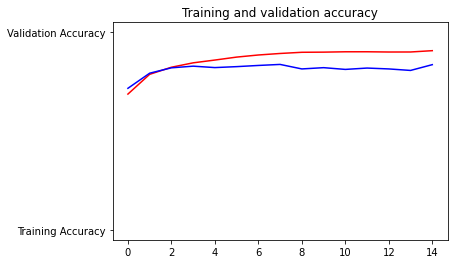

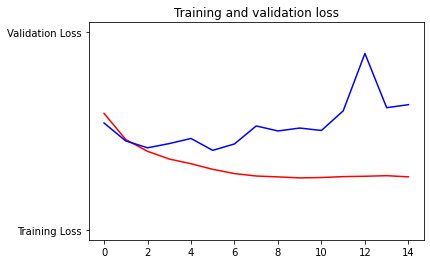

In [15]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")